In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
df =pd.read_csv('iris.csv')
report = df.describe()
print(report)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [4]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


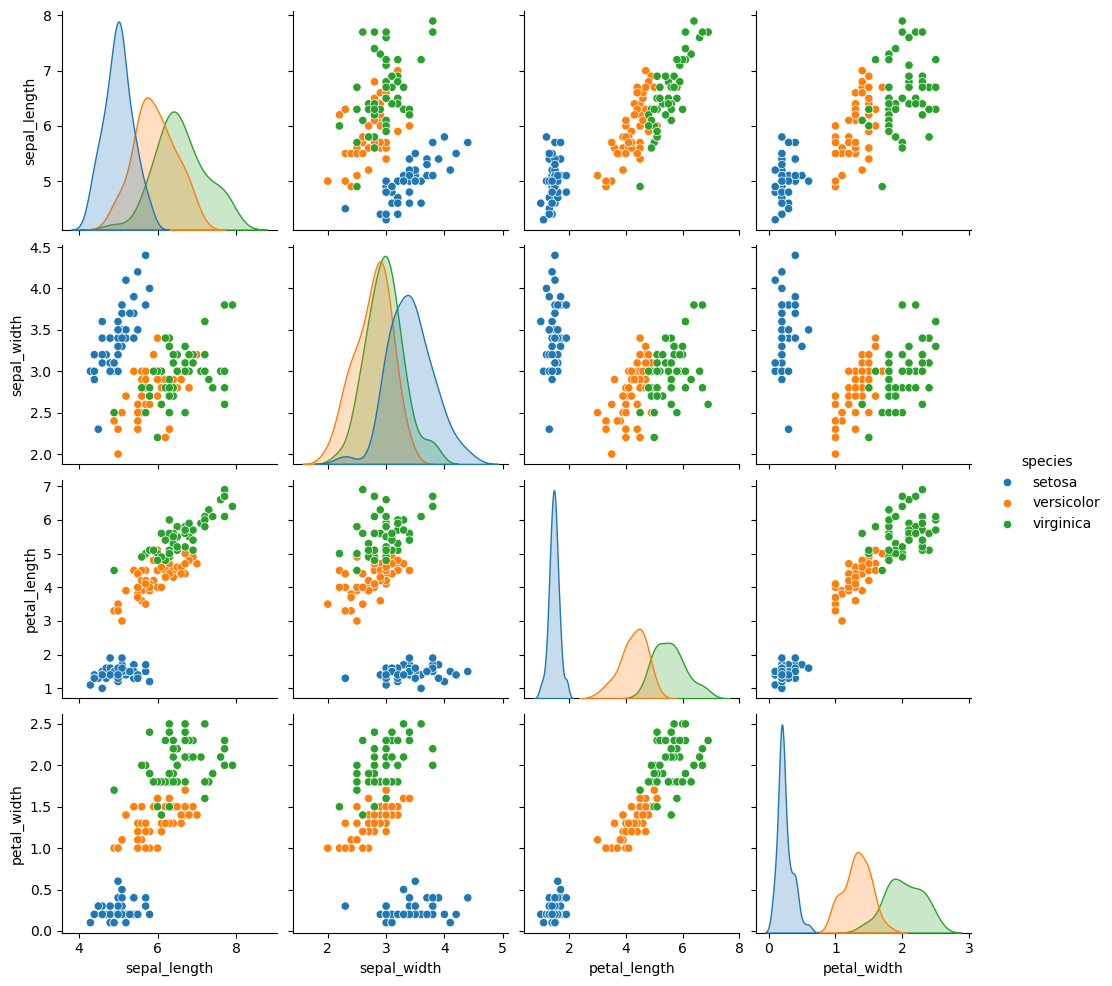

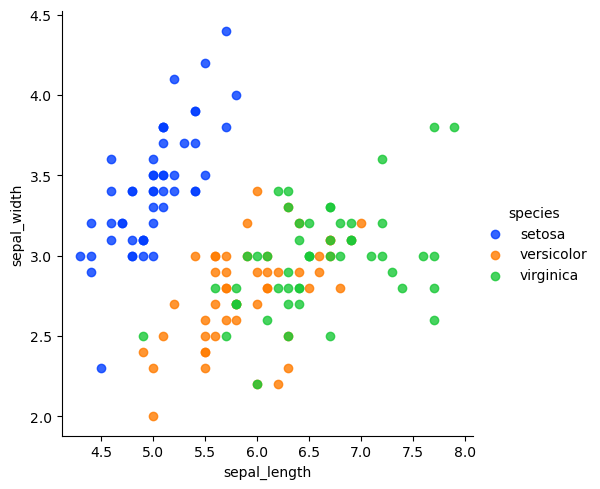

In [5]:
sns.pairplot(df,hue='species')
sns.lmplot(x='sepal_length',y='sepal_width',hue="species",data=df,fit_reg=False,palette='bright')

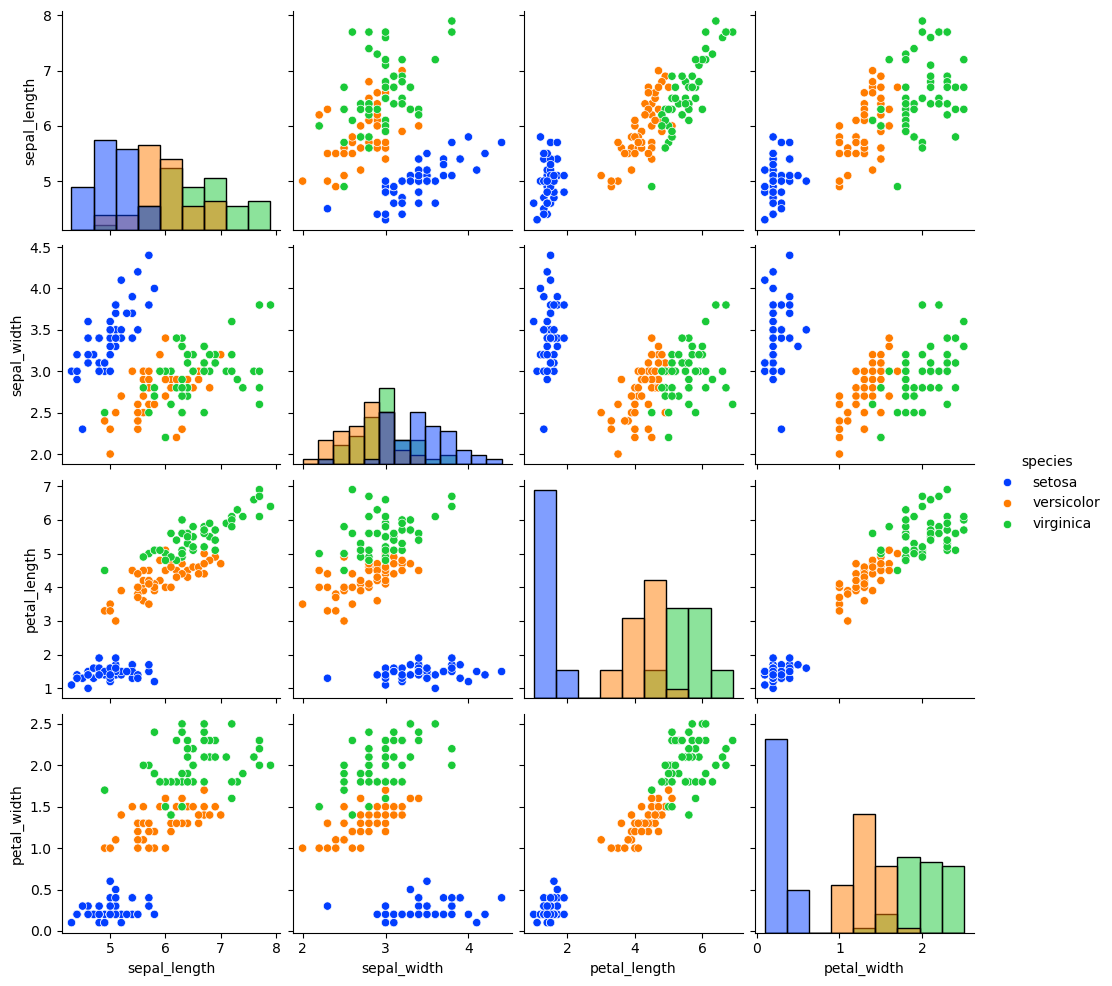

In [6]:
sns.pairplot(df,hue='species',diag_kind='hist',palette='bright')

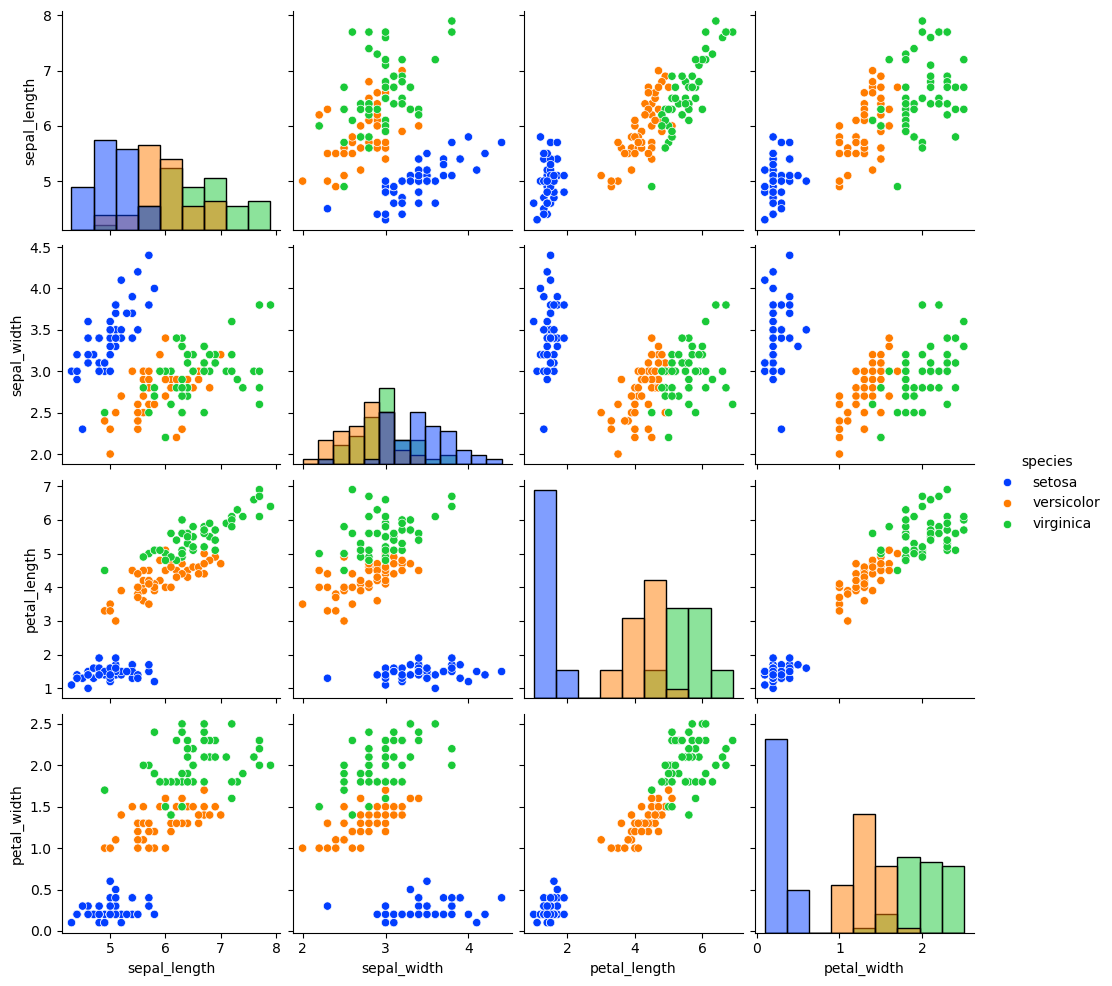

In [7]:
sns.pairplot(df,hue='species',diag_kind='hist',palette='bright')

<Axes: xlabel='species', ylabel='sepal_length'>

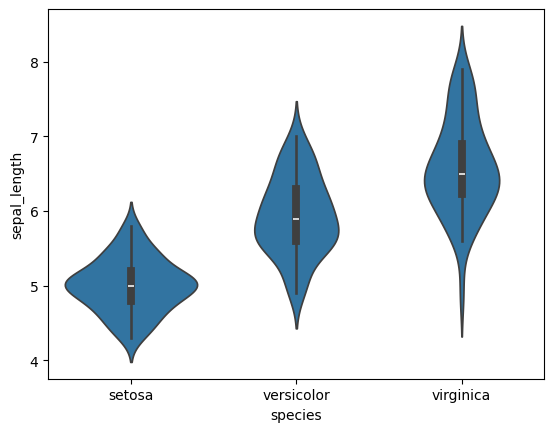

In [8]:
sns.violinplot(x='species',y='sepal_length',data=df)

<Axes: >

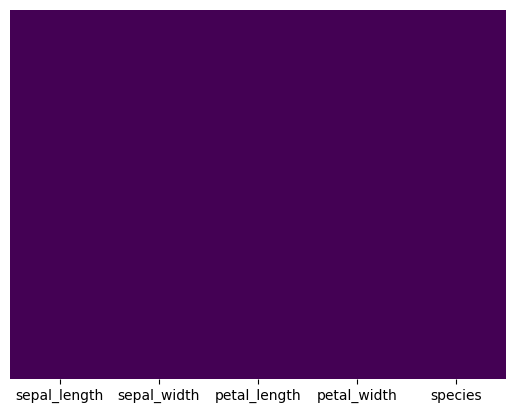

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
def class_seperation(dataset):
    class_dict = dict()

    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]

        if class_value not in class_dict:
            class_dict[class_value] = list()

        class_dict[class_value].append(vector)

    return class_dict

class_dict = class_seperation(df.values)


In [11]:
def train_test_seperation(dataset):
    class_dict_train = dict()
    class_dict_test = dict()

    for label in dataset:
        data_train, data_test = train_test_split(dataset[label], test_size=0.2)

        class_dict_train[label] = list()
        class_dict_test[label] = list()

        class_dict_train[label].append(data_train)
        class_dict_test[label].append(data_test)

    return class_dict_train, class_dict_test
class_dict_train, class_dict_test = train_test_seperation(class_dict)


In [12]:
def mean(x):
    return sum(x)/float(len(x))

In [13]:
from math import sqrt
def stdev(x):
    avg=mean(x)
    variance=sum([(xi-avg)**2 for xi in x])/float(len(x)-1)
    return sqrt(variance)

In [14]:
def feature_statistics(dataset):
    statistics = [(mean(feature), stdev(feature), len(feature)) for feature in dataset]
    return statistics

def statistics_by_class(class_dict):
    statistics = dict()

    for class_label, rows in class_dict.items():
        data = np.transpose(rows)[:-1] 
        statistics[class_label] = feature_statistics(data)

    return statistics
train_statistics = statistics_by_class(class_dict_train)


C:\Users\Student\AppData\Local\Temp\ipykernel_8568\294631552.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return sqrt(variance)


In [15]:
from math import exp, sqrt, pi

def probability_calculation(x, mean, stdev):
    exponent = exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent


In [16]:
def discriminator(train_statistics, x):
    
    total_patterns = sum([train_statistics[label][0][2] for label in train_statistics])

    discriminant = dict()
    for class_label, class_statistics in train_statistics.items():
        
        discriminant[class_label] = train_statistics[class_label][0][2] / float(total_patterns)

        for i in range(len(class_statistics)):
            mean, stdev, _ = class_statistics[i]  

            discriminant[class_label] *= probability_calculation(x[i], mean, stdev)

    return discriminant

In [17]:
def predict(train_statistics, x):
    discriminant = discriminator(train_statistics, x)

    best_label, best_prob = None, -1  

    for class_i, discriminat_i in discriminant.items():
        if best_prob is None or discriminat_i > best_prob:
            best_prob = discriminat_i
            best_label = class_i

    return best_label, best_prob


In [18]:
def naive_bayes(train, test):
    
    train_statistics = statistics_by_class(train)

    predictions = dict()

    for class_label, data in test.items():
        predictions[class_label] = list()  

        for x in data[0]:
            
            output, _ = predict(train_statistics, x[:-1])

            predictions[class_label].append(output)

    return predictions


In [19]:
from sklearn.metrics import confusion_matrix

def confusionMatrix(predictions):
    actualLabel = list()
    predictedLabel = list()
    labelList = list()

    for actu_label, predicted in predictions.items():
        labelList.append(actu_label)

        for label in predicted:
            actualLabel.append(actu_label)
            predictedLabel.append(label)
    confu_matrix = confusion_matrix(y_true=actualLabel, y_pred=predictedLabel, labels=labelList)
    return confu_matrix, labelList

predictions = naive_bayes(class_dict_train, class_dict_test)
confu_matrix, _ = confusionMatrix(predictions)

print("Confusion Matrix:")
print(confu_matrix)



Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


C:\Users\Student\AppData\Local\Temp\ipykernel_8568\294631552.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return sqrt(variance)
C:\Users\Student\AppData\Local\Temp\ipykernel_8568\3810407885.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  exponent = exp(-((x - mean) ** 2 / (2 * stdev ** 2)))


In [21]:
def accuracy(perdictions):
    actualLabel=list()
    predictedLabel = list()
    for actu_label,predicted in predictions.items():
        for label in predicted:
            actualLabel.append(actu_label)
            predictedLabel.append(label)
            accu=accuracy_score(y_true=actualLabel,y_pred=predictedLabel,normalize=True)
            return accu
        
accu=accuracy(predictions)
print("Accuracy:",accu)

Accuracy: 1.0
